# Import of libraries

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd    
from shapely.geometry import Point    
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score


warnings.filterwarnings('ignore')

# Data loading

In [2]:
RMQS_carbon = pd.read_excel("data/RMQS1_analyses_composites.xlsx")
print("Display the 5 first rows to understand the structure")
RMQS_carbon.head()

Display the 5 first rows to understand the structure


,no_campagne,id_site,date_complete,code_dept,site_officiel,x_theo,y_theo,type_profil_rmqs,no_couche,profondeur_hz_sup,...,hg_tot_79,cond_elec_119_1,cond_elec_129,cl_sol_195,ca_sol_194,k_sol_201,mg_sol_194,na_sol_201,n_tot_sol_221,s_sol_202
0,1,6,2002-09-10,59,True,652326.99,7101219.71,C,1,0,...,0.066,ND,ND,ND,ND,ND,ND,ND,ND,ND
1,1,6,2002-09-10,59,True,652326.99,7101219.71,C,2,29,...,0.01,ND,ND,ND,ND,ND,ND,ND,ND,ND
2,1,7,2002-09-02,59,True,668319.25,7101085.53,C,1,0,...,0.037,ND,ND,ND,ND,ND,ND,ND,ND,ND
3,1,7,2002-09-02,59,True,668319.25,7101085.53,C,2,31,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
4,1,8,2003-07-02,62,True,604216.81,7085629.01,C,1,0,...,0.036,ND,ND,ND,ND,ND,ND,ND,ND,ND


In [3]:
RMQS_carbon.isnull().any()

no_campagne      False
id_site          False
date_complete    False
code_dept        False
site_officiel    False
                 ...  
k_sol_201        False
mg_sol_194       False
na_sol_201       False
n_tot_sol_221    False
s_sol_202        False
Length: 68, dtype: bool

In [4]:
print('dimensions of the dataframe are respectively observations: {}, columns: {}\n'.format(RMQS_carbon.shape[0], RMQS_carbon.shape[1]))
print("There is no null values in the dataframe.")

dimensions of the dataframe are respectively observations: 4148, columns: 68

There is no null values in the dataframe.


In [58]:
RMQS_carbon.columns

Index(['no_campagne', 'id_site', 'date_complete', 'code_dept', 'site_officiel',
       'x_theo', 'y_theo', 'type_profil_rmqs', 'no_couche',
       'profondeur_hz_sup', 'profondeur_hz_inf', 'teneur_eau_res_166_1',
       'argile', 'limon_fin', 'limon_grossier', 'sable_fin', 'sable_grossier',
       'cec_40_1', 'ca_ech_40_3', 'k_ech_40_3', 'mg_ech_40_3', 'na_ech_40_3',
       'mn_ech_40', 'al_ech_40_3', 'fe_ech_40_3', 'p_ass_81_1',
       'calc_tot_2_1_2', 'ph_eau_6_1', 'carbone_16_5_1', 'n_tot_31_1',
       'mat_org_0', 'fe_lib_49_2', 'fe_lib_51', 'al_tot_hf', 'ca_tot_hf',
       'fe_tot_hf', 'mg_tot_hf', 'mn_tot_hf', 'k_tot_hf', 'na_tot_hf',
       'p_tot_hf', 'b_ext_65_1', 'cd_tot_hf', 'cd_ext_66_1', 'co_tot_hf',
       'cr_tot_hf', 'cr_ext_66_1', 'cu_tot_hf', 'cu_ext_66_1', 'mo_tot_hf',
       'ni_tot_hf', 'ni_ext_66_1', 'pb_tot_hf', 'pb_ext_66_1', 'tl_tot_hf',
       'zn_tot_hf', 'zn_ext_66_1', 'as_tot_hf', 'hg_tot_79', 'cond_elec_119_1',
       'cond_elec_129', 'cl_sol_195', 'ca_so

In [57]:
# RMQS_carbon['id_site'].unique()
# RMQS_carbon['id_site'].value_counts()
# RMQS_carbon['profondeur_hz_sup'].unique()
# RMQS_carbon['type_profil_rmqs'].unique()
# RMQS_carbon['site_officiel'].value_counts()
RMQS_carbon['no_campagne'].value_counts()

1    4148
Name: no_campagne, dtype: int64

In [60]:
a=12
b=12
print(id(a)=id(b))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (373922459.py, line 3)

In [5]:
RMQS_occupation = pd.read_excel("data/RMQS1_occupation_nommatp_nomsol.xlsx")
print("Display the 5 first rows to understand the structure")
RMQS_occupation.head()

Display the 5 first rows to understand the structure


,no_campagne,id_site,date_complete,insee_commune,nom_commune,code_dept,site_officiel,x_theo,y_theo,classe_mat1p_million_dexpert,...,rp_95_nom,rp_2008_nom,rp_95_ger,signific_ger_95,rp_2008_ger,signific_ger_2008,occupation1,desc_code_occupation1,occupation3,desc_code_occupation3
0,1,6,2002-09-10 00:00:00,59016,ARMBOUTS-CAPPEL,59,1,652326.99,7101219.71,120,...,"THALASSOSOL-REDOXISOL limono-sablo-argileux, b...",ND,156,THALASSOSOL-REDOXISOL,ND,ND,1.0,successions culturales,120.0,grandes cultures et prairies courte duree
1,1,7,2002-09-02 00:00:00,59404,LES MOERES,59,1,668319.25,7101085.53,120,...,THALASSOSOL-REDOXISOL limoneux issu d'alluvion...,ND,156,THALASSOSOL-REDOXISOL,ND,ND,1.0,successions culturales,112.0,systeme de rotations sans prairie sans intercu...
2,1,8,2003-07-02 00:00:00,62806,TARDINGHEN,62,1,604216.81,7085629.01,230,...,"CALCOSOL-REDOXISOL argileux, issu d'une marne,...",ND,29,CALCOSOL-REDOXISOL,ND,ND,2.0,surfaces toujours en herbe,220.0,STH > 10 ans naturelle ou semee
3,1,9,2003-09-16 00:00:00,62397,GUINES,62,1,620208.83,7085495.39,510,...,"BRUNISOL luvique, limoneux, issu de limon loes...",ND,16,BRUNISOL,ND,ND,1.0,successions culturales,113.0,systeme de rotations sans prairie avec intercu...
4,1,10,2003-09-17 00:00:00,62906,ZUTKERQUE,62,1,636200.84,7085361.59,510,...,"BRUNISOL-REDOXISOL luvique, issu de depots red...",ND,21,BRUNISOL-REDOXISOL,ND,ND,1.0,successions culturales,112.0,systeme de rotations sans prairie sans intercu...


In [6]:
print('Dimensions of the occupation dataframe are respectively observations: {}, columns: {}\n'.format(RMQS_occupation.shape[0], RMQS_occupation.shape[1]))

Dimensions of the occupation dataframe are respectively observations: 2175, columns: 25



The datasets contains many colums that measures important informations, but for this project, the only columns we're interested on are:

    ○ id_site and no_couche: we'll use it to merge the two datasets
    ○ Our target variable: carbone_16_5_1
    ○ The features:
    
        ■ Soil composition: to be calculated
        ■ Soil ph: ph_eau_6_1
        ■ Vegetation cover 
        ■ Location 
        
     ○ alternative features (Perhaps):
        ■ SiteTempPrec which has a mapping of sites to average precipitation
        and temperature.

Let's select relevant columns for the modeling process.

# Features engineering
We can merge datasets before selecting columns, but for time processing gain, we'll begin by columns selection.

## Selection of columns in RMQS1_analyses_composites

In [7]:
# Display column names 
RMQS_carbon.columns

Index(['no_campagne', 'id_site', 'date_complete', 'code_dept', 'site_officiel',
       'x_theo', 'y_theo', 'type_profil_rmqs', 'no_couche',
       'profondeur_hz_sup', 'profondeur_hz_inf', 'teneur_eau_res_166_1',
       'argile', 'limon_fin', 'limon_grossier', 'sable_fin', 'sable_grossier',
       'cec_40_1', 'ca_ech_40_3', 'k_ech_40_3', 'mg_ech_40_3', 'na_ech_40_3',
       'mn_ech_40', 'al_ech_40_3', 'fe_ech_40_3', 'p_ass_81_1',
       'calc_tot_2_1_2', 'ph_eau_6_1', 'carbone_16_5_1', 'n_tot_31_1',
       'mat_org_0', 'fe_lib_49_2', 'fe_lib_51', 'al_tot_hf', 'ca_tot_hf',
       'fe_tot_hf', 'mg_tot_hf', 'mn_tot_hf', 'k_tot_hf', 'na_tot_hf',
       'p_tot_hf', 'b_ext_65_1', 'cd_tot_hf', 'cd_ext_66_1', 'co_tot_hf',
       'cr_tot_hf', 'cr_ext_66_1', 'cu_tot_hf', 'cu_ext_66_1', 'mo_tot_hf',
       'ni_tot_hf', 'ni_ext_66_1', 'pb_tot_hf', 'pb_ext_66_1', 'tl_tot_hf',
       'zn_tot_hf', 'zn_ext_66_1', 'as_tot_hf', 'hg_tot_79', 'cond_elec_119_1',
       'cond_elec_129', 'cl_sol_195', 'ca_so

In [8]:
# filter needed columns
RMQS_carbon_filtered = RMQS_carbon[["id_site","no_couche","carbone_16_5_1",'argile', 
                                    'limon_fin', 'limon_grossier',"ph_eau_6_1"]]
RMQS_carbon_filtered.head()

,id_site,no_couche,carbone_16_5_1,argile,limon_fin,limon_grossier,ph_eau_6_1
0,6,1,12.92,247,122,131,8.16
1,6,2,5.247,312,184,128,8.42
2,7,1,14.3,186,134,232,8.2
3,7,2,7.45,333,261,256,8.3
4,8,1,37.513,313,166,195,7.56


##### ■ calculation of Soil composition 
this is defined as the % of clay and silt, and in this sheet is defined as the sum of argile, limon_fin &limon_grossier / 1000 (from RMQS1_analyses_composites)


In [9]:
# information on the dataset
RMQS_carbon_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_site         4148 non-null   int64 
 1   no_couche       4148 non-null   int64 
 2   carbone_16_5_1  4148 non-null   object
 3   argile          4148 non-null   object
 4   limon_fin       4148 non-null   object
 5   limon_grossier  4148 non-null   object
 6   ph_eau_6_1      4148 non-null   object
dtypes: int64(2), object(5)
memory usage: 227.0+ KB


The result above indicates that the column data types differ, preventing numeric operations on these variables. Therefore, we need to transform them.
A quick sight on the excel file show that some lines have as value "ND". Here's an exemple where argile = "ND"

In [10]:
RMQS_carbon_filtered[RMQS_carbon_filtered['limon_grossier'] =="ND"]

,id_site,no_couche,carbone_16_5_1,argile,limon_fin,limon_grossier,ph_eau_6_1
151,91,9,359,ND,ND,ND,3.9
325,193,9,285,ND,ND,ND,3.8
328,194,9,293,ND,ND,ND,4
333,196,9,238,ND,ND,ND,4.1
403,232,9,291,ND,ND,ND,5.21
...,...,...,...,...,...,...,...
4084,10534,9,154,ND,ND,ND,3.57
4092,10797,9,180,ND,ND,ND,4.6
4114,11136,2,ND,ND,ND,ND,ND
4124,11314,9,242,ND,ND,ND,7.05


Let's suppose that "ND" means "No defines".
Since te description of the dataset is not clear. I would like to treat those values as nullValues "NA".

Traditional methods for handling null values are to replace them with the mean, the median, or to delete them. The first solution I considered was to create a column that contains 0 when there's "ND", otherwise to perform the calculation. All while keeping in mind the complexity of the calculations and creating an index.

But looking more closely at the three columns we're concerned with, every time one contains ND, the other two do too (157 ROWS out of 4148). So I preferred to delete those rows to avoid them affecting the modeling.

In [11]:
# Delete rhose rows
print(len(RMQS_carbon_filtered))
RMQS_carbon_filtered = RMQS_carbon_filtered[RMQS_carbon_filtered['limon_grossier'] !="ND"]
print(len(RMQS_carbon_filtered))

4148
3991


In [12]:
# information on the dataset
RMQS_carbon_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 0 to 4146
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_site         3991 non-null   int64 
 1   no_couche       3991 non-null   int64 
 2   carbone_16_5_1  3991 non-null   object
 3   argile          3991 non-null   object
 4   limon_fin       3991 non-null   object
 5   limon_grossier  3991 non-null   object
 6   ph_eau_6_1      3991 non-null   object
dtypes: int64(2), object(5)
memory usage: 249.4+ KB


In [13]:
# convert some columns datatype into integer/float
RMQS_carbon_filtered['argile'] = RMQS_carbon_filtered['argile'].astype(int)
RMQS_carbon_filtered['limon_fin'] = RMQS_carbon_filtered['limon_fin'].astype(int)
RMQS_carbon_filtered['limon_grossier'] = RMQS_carbon_filtered['limon_grossier'].astype(int)
RMQS_carbon_filtered['carbone_16_5_1'] = RMQS_carbon_filtered['carbone_16_5_1'].astype(float,2)
RMQS_carbon_filtered['ph_eau_6_1'] = RMQS_carbon_filtered['ph_eau_6_1'].astype(float,2)

In [14]:
# information on the dataset after conversion
RMQS_carbon_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 0 to 4146
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_site         3991 non-null   int64  
 1   no_couche       3991 non-null   int64  
 2   carbone_16_5_1  3991 non-null   float64
 3   argile          3991 non-null   int32  
 4   limon_fin       3991 non-null   int32  
 5   limon_grossier  3991 non-null   int32  
 6   ph_eau_6_1      3991 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 202.7 KB


In [15]:
# Now calculate the soil composition
RMQS_carbon_filtered["soil_composition"] = (
    RMQS_carbon_filtered['argile'] + 
    RMQS_carbon_filtered['limon_fin'] + 
    RMQS_carbon_filtered['limon_grossier']
) / 1000

# Display the first few rows to verify
RMQS_carbon_filtered.head()


,id_site,no_couche,carbone_16_5_1,argile,limon_fin,limon_grossier,ph_eau_6_1,soil_composition
0,6,1,12.920,247,122,131,8.16,0.500
1,6,2,5.247,312,184,128,8.42,0.624
2,7,1,14.300,186,134,232,8.20,0.552
3,7,2,7.450,333,261,256,8.30,0.850
4,8,1,37.513,313,166,195,7.56,0.674


In [16]:
# information on the dataset
RMQS_carbon_filtered.describe()

,id_site,no_couche,carbone_16_5_1,argile,limon_fin,limon_grossier,ph_eau_6_1,soil_composition
count,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000
mean,1308.323227,1.470559,18.950742,247.980205,224.791531,176.208720,6.502463,0.648980
std,1493.618947,0.564242,19.994965,135.733115,96.676860,115.236343,1.324798,0.238764
min,6.000000,1.000000,0.590000,2.000000,1.000000,1.000000,3.680000,0.012000
25%,571.500000,1.000000,7.475000,154.000000,159.000000,92.000000,5.400000,0.479500
50%,1138.000000,1.000000,13.230000,216.000000,228.000000,145.000000,6.380000,0.699000
75%,1739.000000,2.000000,23.300000,322.000000,290.000000,237.000000,7.885000,0.845000
max,20797.000000,9.000000,302.000000,851.000000,595.000000,555.000000,9.200000,0.998000


## Selection of columns in RMQS1_occupation_nommatp_nomsol

In [17]:
RMQS_occupation.columns

Index(['no_campagne', 'id_site', 'date_complete', 'insee_commune',
       'nom_commune', 'code_dept', 'site_officiel', 'x_theo', 'y_theo',
       'classe_mat1p_million_dexpert', 'libelle_mat1p_million_dexpert',
       'classe_mat2p_million_dexpert', 'libelle_mat2p_million_dexpert',
       'classe_mat3p_million_dexpert', 'libelle_mat3p_million_dexpert',
       'rp_95_nom', 'rp_2008_nom', 'rp_95_ger', 'signific_ger_95',
       'rp_2008_ger', 'signific_ger_2008', 'occupation1',
       'desc_code_occupation1', 'occupation3', 'desc_code_occupation3'],
      dtype='object')

In [18]:
# Vegetation cover - this is defined in desc_code_occupation1 and desc_code_occupation3 
RMQS_occupation_filtered = RMQS_occupation[["id_site","desc_code_occupation1","desc_code_occupation3",
                                            'x_theo', 'y_theo']]
RMQS_occupation_filtered.head()

,id_site,desc_code_occupation1,desc_code_occupation3,x_theo,y_theo
0,6,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71
1,7,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53
2,8,surfaces toujours en herbe,STH > 10 ans naturelle ou semee,604216.81,7085629.01
3,9,successions culturales,systeme de rotations sans prairie avec intercu...,620208.83,7085495.39
4,10,successions culturales,systeme de rotations sans prairie sans intercu...,636200.84,7085361.59


In [19]:
RMQS_carbon_filtered.head()

,id_site,no_couche,carbone_16_5_1,argile,limon_fin,limon_grossier,ph_eau_6_1,soil_composition
0,6,1,12.920,247,122,131,8.16,0.500
1,6,2,5.247,312,184,128,8.42,0.624
2,7,1,14.300,186,134,232,8.20,0.552
3,7,2,7.450,333,261,256,8.30,0.850
4,8,1,37.513,313,166,195,7.56,0.674


## Merge datasets

In [51]:
merged_df = pd.merge(RMQS_carbon_filtered, RMQS_occupation_filtered, on='id_site')
print(len(RMQS_carbon_filtered),len(RMQS_occupation_filtered),len(merged_df))
merged_df.head()

3991 2175 3989


,id_site,no_couche,carbone_16_5_1,argile,limon_fin,limon_grossier,ph_eau_6_1,soil_composition,desc_code_occupation1,desc_code_occupation3,x_theo,y_theo
0,6,1,12.920,247,122,131,8.16,0.500,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71
1,6,2,5.247,312,184,128,8.42,0.624,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71
2,7,1,14.300,186,134,232,8.20,0.552,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53
3,7,2,7.450,333,261,256,8.30,0.850,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53
4,8,1,37.513,313,166,195,7.56,0.674,surfaces toujours en herbe,STH > 10 ans naturelle ou semee,604216.81,7085629.01


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 0 to 3988
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_site                3989 non-null   object 
 1   no_couche              3989 non-null   int64  
 2   carbone_16_5_1         3989 non-null   float64
 3   argile                 3989 non-null   int32  
 4   limon_fin              3989 non-null   int32  
 5   limon_grossier         3989 non-null   int32  
 6   ph_eau_6_1             3989 non-null   float64
 7   soil_composition       3989 non-null   float64
 8   desc_code_occupation1  3977 non-null   object 
 9   desc_code_occupation3  3977 non-null   object 
 10  x_theo                 3989 non-null   object 
 11  y_theo                 3989 non-null   float64
dtypes: float64(4), int32(3), int64(1), object(4)
memory usage: 358.4+ KB


In [22]:
merged_df.columns

Index(['id_site', 'no_couche', 'carbone_16_5_1', 'argile', 'limon_fin',
       'limon_grossier', 'ph_eau_6_1', 'soil_composition',
       'desc_code_occupation1', 'desc_code_occupation3', 'x_theo', 'y_theo'],
      dtype='object')

In [23]:
df = merged_df[['id_site', 'no_couche', 'carbone_16_5_1','ph_eau_6_1', 'soil_composition',
       'desc_code_occupation1', 'desc_code_occupation3', 'x_theo', 'y_theo']]

# Exploratory Data analyssis

## Descriptive analysis

In [24]:
print("Descriptive Statistics:\n", df.describe())  


Descriptive Statistics:
          no_couche  carbone_16_5_1   ph_eau_6_1  soil_composition  \
count  3989.000000     3989.000000  3989.000000       3989.000000   
mean      1.470544       18.956970     6.502239          0.648856   
std       0.564272       19.997971     1.325092          0.238759   
min       1.000000        0.590000     3.680000          0.012000   
25%       1.000000        7.480000     5.400000          0.479000   
50%       1.000000       13.250000     6.370000          0.699000   
75%       2.000000       23.300000     7.890000          0.845000   
max       9.000000      302.000000     9.200000          0.998000   

             y_theo  
count  3.989000e+03  
mean   6.618215e+06  
std    2.347080e+05  
min    6.057202e+06  
25%    6.415467e+06  
50%    6.639257e+06  
75%    6.813660e+06  
max    7.101220e+06  


we can see the stat of eah variable.

## Categorical Analysis

In [25]:
print("All vegetation cover types in desc_code_occupation3 \n\n",df["desc_code_occupation3"].unique())

All vegetation cover types in desc_code_occupation3 

 ['grandes cultures et prairies courte duree'
 'systeme de rotations sans prairie sans interculture'
 'STH > 10 ans naturelle ou semee'
 'systeme de rotations sans prairie avec interculture' 'jachere fixe'
 'STH 6-10 ans semee' 'Surface toujours en herbe (STH)'
 'forets caducifoliees' 'monoculture' 'forets mixtes'
 'forets de coniferes' 'grandes cultures' 'peupleraies' 'maraa®chage'
 'vigne (en culture pure)' nan 'pelouse de parc' 'friches'
 'prairies humides et megaphorbiaies' 'milieux littoraux et halophiles'
 'fruits a\xa0 pepins' 'verger (culture pure)' 'Successions culturales'
 'landes et fruticees' 'vegetation de ceinture des bords des eaux'
 'pelouses alpines et subalpines'
 'STH peu productive ( parcours, landes, alpages)'
 'dunes cotieres et plages de sable' 'tourbieres et marais'
 'steppes et prairies calcaires seches' 'vergers â€“ autres cultures'
 'fruits a\xa0 coques' 'horticulture ornementale herbacee et ligneux'
 'mil

In [26]:
print("5 most vegetation cover types in desc_code_occupation3 \n\n",df["desc_code_occupation3"].value_counts()[:5])

5 most vegetation cover types in desc_code_occupation3 

 systeme de rotations sans prairie sans interculture    833
STH > 10 ans naturelle ou semee                        735
forets caducifoliees                                   559
grandes cultures et prairies courte duree              361
forets mixtes                                          275
Name: desc_code_occupation3, dtype: int64


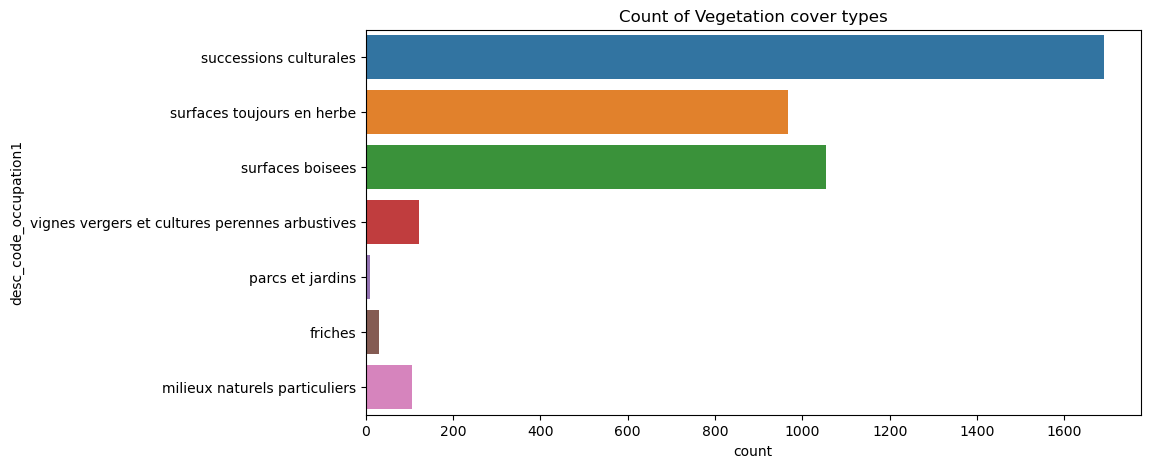

In [27]:
plt.figure(figsize=(10, 5))  
sns.countplot(y='desc_code_occupation1', data=df)  
plt.title('Count of Vegetation cover types')  
plt.show()  

The category "successions culturelles" has the highest count, indicating it is the most prevalent vegetation cover type in the dataset.
"surfaces toujours en herbe" and "surfaces boisées" also show significant counts, but they are lower than "successions culturelles."
The remaining categories, such as "vignes vergers et cultures perennes arbustives," "parcs et jardins," "friches," and "milieux naturels particuliers," have comparatively lower counts.

## Data visualisation

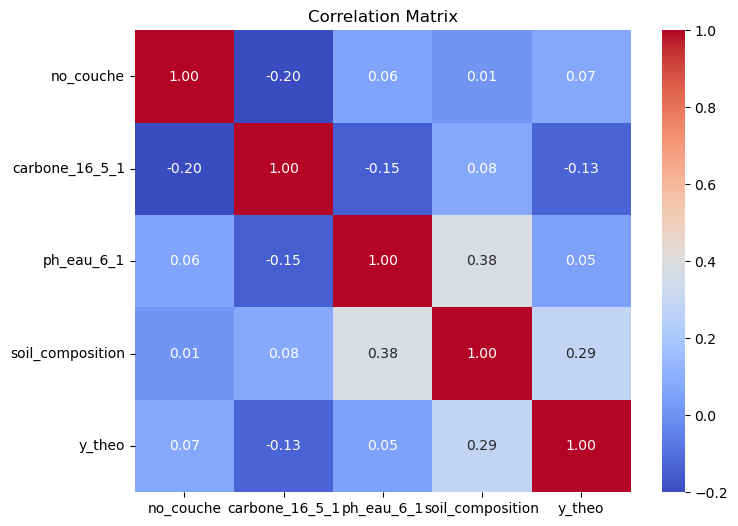

In [28]:
# Correlation Matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Matrix')  
plt.show()  

Overall, the correlations in this matrix indicate mostly weak relationships among the variables, with the exception of a moderate correlation between pH level and soil composition. The weak negative correlation between the number of layers and carbon values may warrant further investigation.

<Figure size 800x600 with 0 Axes>

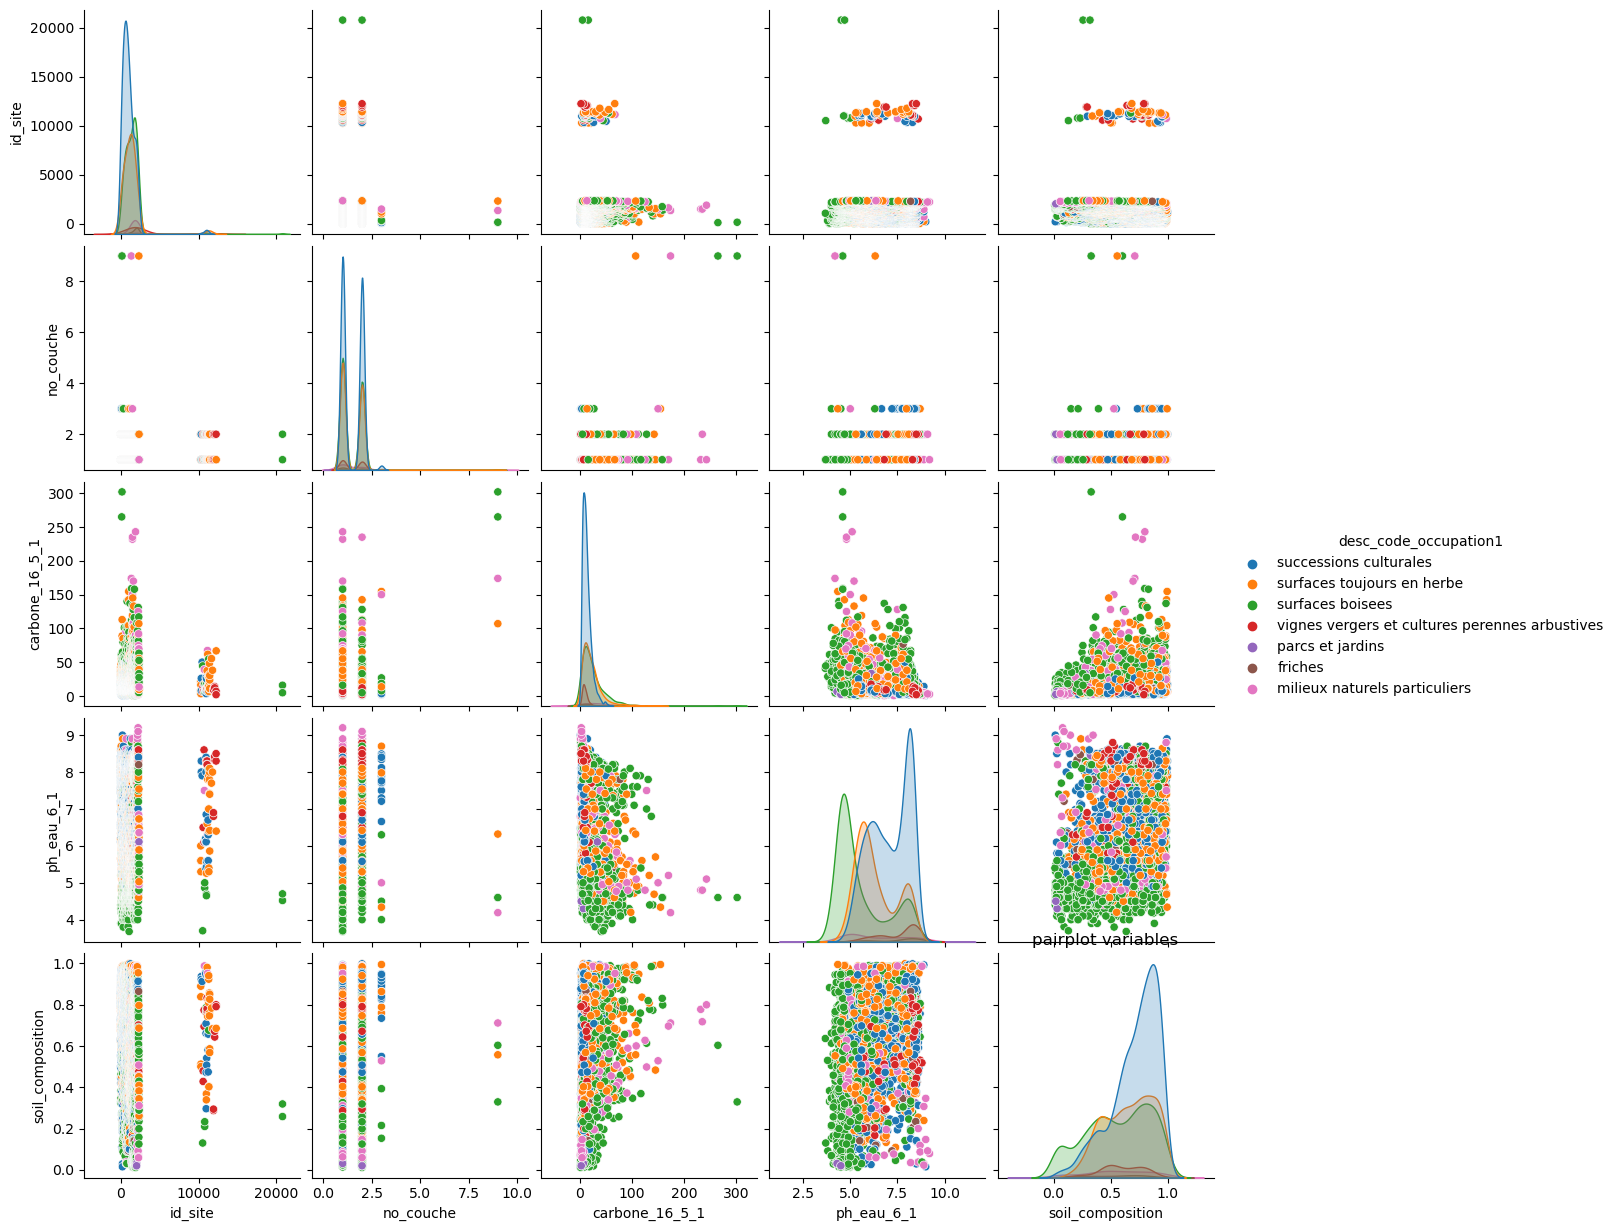

In [29]:
plt.figure(figsize=(8, 6))  
sns.pairplot(df[['id_site', 'no_couche', 'carbone_16_5_1','ph_eau_6_1', 'soil_composition',
       'desc_code_occupation1', 'desc_code_occupation3']],hue="desc_code_occupation1")
plt.title('pairplot variables')  
plt.show()  

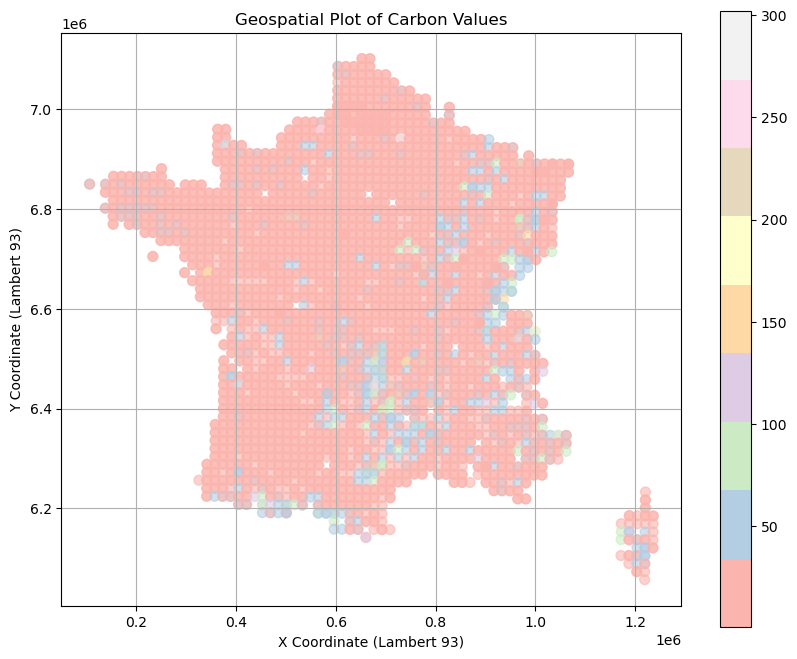

In [30]:
# Create a GeoDataFrame  
geometry = [Point(xy) for xy in zip(df['x_theo'], df['y_theo'])]  
gdf = gpd.GeoDataFrame({'carbon': df['carbone_16_5_1']}, geometry=geometry)  

# Plotting  
fig, ax = plt.subplots(figsize=(10, 8))  
gdf.plot(column='carbon', ax=ax, legend=True, cmap='Pastel1',  
          markersize=50, alpha=0.6)  

plt.title('Geospatial Plot of Carbon Values')  
plt.xlabel('X Coordinate (Lambert 93)')  
plt.ylabel('Y Coordinate (Lambert 93)')  
plt.grid()  
plt.show()

## Transform categorical variables on numeric
The column `desc_code_occupation3` contains an excessive number of unique values, making it challenging to transform into a numerical format suitable for modeling. Since I also have `desc_code_occupation1`, which presumably serves a similar purpose, I prefer to retain this latter column and drop `desc_code_occupation3` from the dataset. This decision simplifies the data preparation process by eliminating the complication of handling a high cardinality feature that may not contribute additional value to the analysis.


In [31]:
df_dummies = pd.get_dummies(df, columns=['desc_code_occupation1'], drop_first=True)  
df_dummies.head()

,id_site,no_couche,carbone_16_5_1,ph_eau_6_1,soil_composition,desc_code_occupation3,x_theo,y_theo,desc_code_occupation1_milieux naturels particuliers,desc_code_occupation1_parcs et jardins,desc_code_occupation1_successions culturales,desc_code_occupation1_surfaces boisees,desc_code_occupation1_surfaces toujours en herbe,desc_code_occupation1_vignes vergers et cultures perennes arbustives
0,6,1,12.920,8.16,0.500,grandes cultures et prairies courte duree,652326.99,7101219.71,0,0,1,0,0,0
1,6,2,5.247,8.42,0.624,grandes cultures et prairies courte duree,652326.99,7101219.71,0,0,1,0,0,0
2,7,1,14.300,8.20,0.552,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53,0,0,1,0,0,0
3,7,2,7.450,8.30,0.850,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53,0,0,1,0,0,0
4,8,1,37.513,7.56,0.674,STH > 10 ans naturelle ou semee,604216.81,7085629.01,0,0,0,0,1,0


# Modelisation

## train test split

In [32]:
X = df_dummies.drop(columns=['carbone_16_5_1',"id_site","desc_code_occupation3"])  # Features  
y = df_dummies['carbone_16_5_1']  

In [33]:
# use 20% of data for test set and the rest on train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
It is a key step to ensuring that models treat all variables on an equal basis, which often enhances the performance and stability of machine learning models.


In [34]:
df.columns

Index(['id_site', 'no_couche', 'carbone_16_5_1', 'ph_eau_6_1',
       'soil_composition', 'desc_code_occupation1', 'desc_code_occupation3',
       'x_theo', 'y_theo'],
      dtype='object')

In [35]:
columns_to_standardize = ['ph_eau_6_1', 'soil_composition']
scaler = StandardScaler()  

In [36]:
X_train[['ph_eau_6_1', 'soil_composition']] = scaler.fit_transform(X_train[['ph_eau_6_1', 'soil_composition']])

In [37]:
X_test[['ph_eau_6_1', 'soil_composition']] = scaler.fit_transform(X_test[['ph_eau_6_1', 'soil_composition']])

## training the model
As part of our analysis, we decided to go with a regression model to predict the target variable based on the various features of our dataset. Regression is especially well-suited for this kind of problem because it allows us to quantify the relationship between the independent variables and the dependent variable.

We chose this model because of its simplicity and effectiveness in handling continuous data.

In [38]:
# Create the model  
model = RandomForestRegressor(n_estimators=200, random_state=42)  # n_estimators is the number of trees  

# Train the model  
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [39]:
# Make predictions  
y_pred = model.predict(X_test)

In [40]:
# comparaison of trues values and predicted
print(y_pred[:5], y_test[:5].values)

[ 5.679345 22.774105 10.04689   8.881785 14.224175] [ 7.58 27.5  13.2  21.8  14.  ]


#  Perform an assessment on the quality of the model and comment on what you see. Do you see a possibility of being able to use this for predictions? 

Predicted values: [ 5.679345 22.774105 10.04689   8.881785 14.224175]
Actual test values: [ 7.58 27.5  13.2  21.8  14.  ]


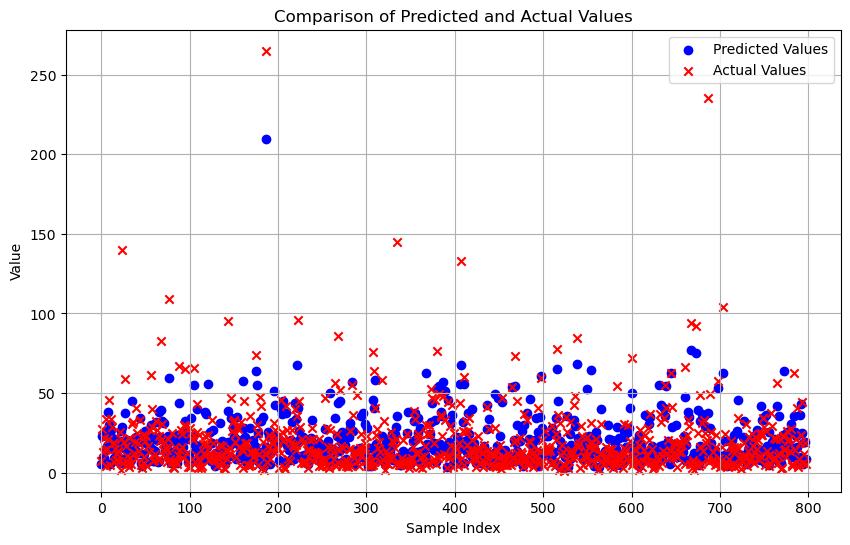

In [41]:
import matplotlib.pyplot as plt  


# Display the first five predicted values and the first five actual test values  
print("Predicted values:", y_pred[:5])  
print("Actual test values:", y_test[:5].values)  

# Create a scatter plot  
plt.figure(figsize=(10, 6))  
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Values', marker='o')  
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values', marker='x')  

# Adding titles and labels  
plt.title('Comparison of Predicted and Actual Values')  
plt.xlabel('Sample Index')  
plt.ylabel('Value')  
plt.legend()  
plt.grid()  

# Show the plot  
plt.show()

See the 5 first values above. The prediction is not too bad

In [42]:
# Evaluate the model using Mean Squared Error and R² score  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f'Mean Squared Error: {mse}')  
print(f'R² Score: {r2}')

Mean Squared Error: 192.85707589796866
R² Score: 0.5604582246174588


The evaluation metrics suggest that the model performed moderately.
192.85 of error metrics and a mean R² score ~ 56%), then the model is likely capable of making reliable predictions.further improvements may be necessary before using it for predictions.

## What options do we have to make the model perform better?

Options to Improve Model Performance

1. Feature Engineering:

            Create new features based on domain knowledge or data exploration.
            For example the precipitations data would be more relevant than other variables on the dataset. Also maybe include time variable.

2. Hyperparameter Tuning:

Use techniques like Grid Search or Random Search to find the optimal hyperparameters for the model, which can greatly enhance performance.


3. Ensemble Methods:

Combine predictions from multiple models (e.g., bagging, boosting) to potentially achieve better performance than a single model.

4. Increase Data:

If possible, gather more data or improve the quality of existing data, as larger datasets can lead to better model training.

5. Model Selection:

Explore different modeling algorithms (polynomial regression, support vector regression, or tree-based ensemble methods like Gradient Boosting) that might capture the underlying relationships more effectively than the current model. Maybe try times series models if time data is added.


Conclusion
In summary, by rigorously assessing the model's quality through appropriate metrics and diagnostics, you can determine its current predictive capability. Should the model reveal room for improvement, various strategies—including feature engineering, hyperparameter tuning, and exploring alternative modeling techniques—can enhance its performance, ultimately leading to better prediction capabilities.

Additionally, I would have appreciated more time to thoroughly analyze the data. With more time, I could delve deeper into the datasets, uncovering insights and patterns that may not have been immediately apparent. This additional analysis would allow for a more comprehensive understanding of the data, potentially leading to more informed decisions and improved model performance.

# Add temperature data

In [44]:
temperature = pd.read_excel("data/SiteTempPrec.xlsx")
temperature.head()

,id_site,nom_commune,x_theo,y_theo,lat,lon,avg_temp,avg_prec
0,6.0,ARMBOUTS-CAPPEL,652326.99,7101219.71,51.004938,2.322287,10.275,58.55
1,7.0,LES MOERES,668319.25,7101085.53,51.004759,2.549635,10.275,58.55
2,8.0,TARDINGHEN,604216.81,7085629.01,50.859535,1.642270,10.275,58.55
3,9.0,GUINES,620208.83,7085495.39,50.860597,1.868951,10.275,58.55
4,10.0,ZUTKERQUE,636200.84,7085361.59,50.861246,2.095639,10.275,58.55


In [47]:
temperature = temperature[["id_site","x_theo","y_theo","avg_temp","avg_prec"]]
# temperature.head()

In [45]:
df.head()

,id_site,no_couche,carbone_16_5_1,ph_eau_6_1,soil_composition,desc_code_occupation1,desc_code_occupation3,x_theo,y_theo
0,6,1,12.920,8.16,0.500,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71
1,6,2,5.247,8.42,0.624,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71
2,7,1,14.300,8.20,0.552,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53
3,7,2,7.450,8.30,0.850,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53
4,8,1,37.513,7.56,0.674,surfaces toujours en herbe,STH > 10 ans naturelle ou semee,604216.81,7085629.01


In [50]:
all_data = df.merge(temperature,on=["id_site","x_theo","y_theo"])
print(len(df),len(temperature),len(all_data))
all_data

3989 2130 3927


,id_site,no_couche,carbone_16_5_1,ph_eau_6_1,soil_composition,desc_code_occupation1,desc_code_occupation3,x_theo,y_theo,avg_temp,avg_prec
0,6,1,12.920,8.16,0.500,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71,10.275000,58.550000
1,6,2,5.247,8.42,0.624,successions culturales,grandes cultures et prairies courte duree,652326.99,7101219.71,10.275000,58.550000
2,7,1,14.300,8.20,0.552,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53,10.275000,58.550000
3,7,2,7.450,8.30,0.850,successions culturales,systeme de rotations sans prairie sans intercu...,668319.25,7101085.53,10.275000,58.550000
4,8,1,37.513,7.56,0.674,surfaces toujours en herbe,STH > 10 ans naturelle ou semee,604216.81,7085629.01,10.275000,58.550000
...,...,...,...,...,...,...,...,...,...,...,...
3922,12258,1,6.910,8.30,0.799,vignes vergers et cultures perennes arbustives,vigne (en culture pure),644812.62,6205967.06,14.116667,54.041667
3923,12258,2,1.960,8.50,0.790,vignes vergers et cultures perennes arbustives,vigne (en culture pure),644812.62,6205967.06,14.116667,54.041667
3924,12272,1,66.800,6.40,0.685,surfaces toujours en herbe,STH > 10 ans naturelle ou semee,500848,6191184.31,12.325000,79.350000
3925,20797,1,15.900,4.52,0.258,surfaces boisees,forets caducifoliees,617398.03,6749706.90,11.075000,51.025000


In [43]:
df.to_csv("data/df.csv")